# Introduction

Studies have shown that regular running can lower [blood pressure](https://www.themanual.com/fitness/how-to-lower-blood-pressure/) and resting heart rate, improve blood sugar control, reduce triglycerides and [cholesterol](https://www.themanual.com/fitness/how-to-lower-cholesterol/) levels, as well as waist circumference and body fat percentage. Improving these health markers can reduce risk of disease and help to feel healthier overall.

As a software developer, I spend most of my time sitting in front of a computer at work or at university, this sedentary lifestyle has had a negative impact on my overall health, I was becoming less and less productive, got out of breath easily and had trouble with strenuous activity, Then I decided to take care of myself and start running regularly in **july 2021** and for about a year now the app I use ([Adidas Running](https://www.runtastic.com/)) has been collecting data from my workouts

This project aims to visualize and analyze my progress during this period to discover but also understand how certain factors have influenced my performance and also how I could improve or adapt my training to be able to run a **40km marathon by July 2023**


# Objectives

I would like to make my data speak, to do this I will start by asking myself some general questions in order to orientate my analysis and research, the general objective is to answer the following questions:

- What day of the week do I run the most?
- Does the temperature influence my performance?
- What is the best time to run?
- Has my average speed increased over time?
- How long did I run in total?
- How many kilometres did I run in total ?
- How many calories did I burn in total?

In [301]:
!pip install pandas numpy matplotlib seaborn calmap

# Data preparation

The data exported from Adidas running is separated in several files and each file includes a uuid and the date of the sport activity in the file name, the same information is included in the file in json format. 

to facilitate the processing I will keep only the uuid as file name to facilitate the liason with the other data (gps and elevation)

In [302]:
import fnmatch
import shutil
import re
import os

def formatDatasetFilename(source: str, destination: str, extension: str = 'json') -> list :
    formatedFilenames = [];
    shutil.rmtree(destination, ignore_errors=True)
    os.mkdir(destination)

    for file in os.listdir(source):
        if fnmatch.fnmatch(file, f'*.{extension}'):

            # removing datetime from original filename
            filename = os.path.join(destination, re.sub("^(.*?)UTC_", "", file))
            shutil.copy(os.path.join(source, file), filename)
            formatedFilenames.append(filename)
    
    return formatedFilenames;

sessions = formatDatasetFilename('./dataset/Sport-sessions', './data/sessions');
gps = formatDatasetFilename('./dataset/Sport-sessions/GPS-data', './data/gps', extension='gpx');
elevations = formatDatasetFilename('./dataset/Sport-sessions/Elevation-data', './data/elevations')

In [303]:
import json
import datetime as dt

sessions_data = []
for session in sessions:
    with open(session, 'r') as f:
        sessions_data.append(json.load(f))

# removing non running sport session
sessions_data = list(filter(lambda session: session['sport_type_id'] == '1', sessions_data))
    
# converting unix timestamp to datatime object
def timestampToDatetime(session: dict, fields: list) -> None :
    for field in fields:
        timestamp = int(session[field]) / 1000
        timezone = dt.timezone(dt.timedelta(seconds=7200)) #UTC+2
        session[field] = dt.datetime.fromtimestamp(timestamp, tz=timezone)

# formalizing data
for session in sessions_data:
    session['distance'] = session['distance'] / 1000.0
    session['duration'] = round((session['duration'] / 1000) / 60, 2)
    session['max_speed'] = round(float(session['max_speed']), 2)
    session['average_speed'] = round(float(session['average_speed']), 2)
    timestampToDatetime(session,['start_time', 'end_time', 'created_at', 'updated_at'])

In [304]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

sessions_df = pd.DataFrame(sessions_data)

# Creating new features from the data
sessions_df['year'] = sessions_df.start_time.dt.year
sessions_df['month'] = sessions_df.start_time.dt.month
sessions_df['weekday'] = sessions_df.start_time.dt.day_name()
sessions_df['created_at'] = sessions_df.start_time.dt.date
sessions_df['weekday_number'] = sessions_df.start_time.dt.weekday

# Data Visualization

After having prepared my data I can now visualize them according to the different questions I have about my performance

In [305]:
import matplotlib.pyplot as plt
colors = {
    "black": "#000",
    "white": "#fff",
    "gray": {
        50: "#f9fafb",
        100: "#f3f4f6",
        200: "#e5e7eb",
        300: "#d1d5db",
        400: "#9ca3af",
        500: "#6b7280",
        600: "#4b5563",
        700: "#374151",
        800: "#1f2937",
        900: "#111827"
    },
    "red": {
        50: "#fef2f2",
        100: "#fee2e2",
        200: "#fecaca",
        300: "#fca5a5",
        400: "#f87171",
        500: "#ef4444",
        600: "#dc2626",
        700: "#b91c1c",
        800: "#991b1b",
        900: "#7f1d1d"
    },
    "orange": {
        50: "#fff7ed",
        100: "#ffedd5",
        200: "#fed7aa",
        300: "#fdba74",
        400: "#fb923c",
        500: "#f97316",
        600: "#ea580c",
        700: "#c2410c",
        800: "#9a3412",
        900: "#7c2d12"
    },
    "yellow": {
        50: "#fefce8",
        100: "#fef9c3",
        200: "#fef08a",
        300: "#fde047",
        400: "#facc15",
        500: "#eab308",
        600: "#ca8a04",
        700: "#a16207",
        800: "#854d0e",
        900: "#713f12"
    },
    "green": {
        50: "#f0fdf4",
        100: "#dcfce7",
        200: "#bbf7d0",
        300: "#86efac",
        400: "#4ade80",
        500: "#22c55e",
        600: "#16a34a",
        700: "#15803d",
        800: "#166534",
        900: "#14532d"
    },
    "cyan": {
        50: "#ecfeff",
        100: "#cffafe",
        200: "#a5f3fc",
        300: "#67e8f9",
        400: "#22d3ee",
        500: "#06b6d4",
        600: "#0891b2",
        700: "#0e7490",
        800: "#155e75",
        900: "#164e63"
    },
    "blue": {
        50: "#eff6ff",
        100: "#dbeafe",
        200: "#bfdbfe",
        300: "#93c5fd",
        400: "#60a5fa",
        500: "#3b82f6",
        600: "#2563eb",
        700: "#1d4ed8",
        800: "#1e40af",
        900: "#1e3a8a"
    },
    "indigo": {
        50: "#eef2ff",
        100: "#e0e7ff",
        200: "#c7d2fe",
        300: "#a5b4fc",
        400: "#818cf8",
        500: "#6366f1",
        600: "#4f46e5",
        700: "#4338ca",
        800: "#3730a3",
        900: "#312e81"
    },
    "pink": {
        50: "#fdf2f8",
        100: "#fce7f3",
        200: "#fbcfe8",
        300: "#f9a8d4",
        400: "#f472b6",
        500: "#ec4899",
        600: "#db2777",
        700: "#be185d",
        800: "#9d174d",
        900: "#831843"
    }
}


## Sport Session Frequency 

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

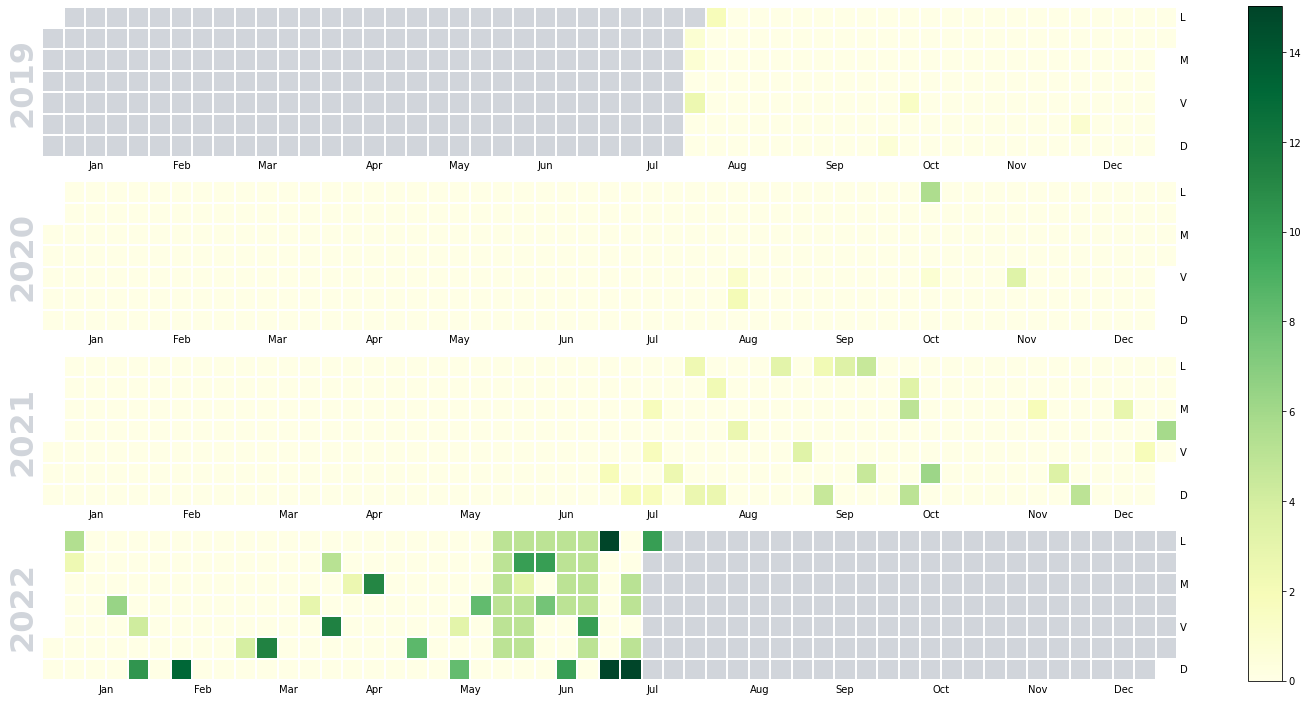

In [306]:
import calmap

sessions_calmap = sessions_df[['created_at', 'distance']].sort_values(by='created_at')
sessions_calmap = sessions_calmap.reset_index(drop=True)
sessions_calmap = pd.Series(
    sessions_calmap['distance'].tolist(),
    pd.DatetimeIndex(sessions_calmap['created_at'].tolist())
);

plt.rcParams["figure.figsize"] = (20, 10)
fig,ax = calmap.calendarplot(
    sessions_calmap,
    monthticks=3,
    cmap='YlGn', 
    fillcolor= colors['gray'][300],
    daylabels='LMMJVSD',
    linewidth=2,
    dayticks=[0, 2, 4, 6],
    fig_kws=dict(figsize=(20, 10))
);

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist());

## What day of the week did I run the most kilometres?

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).


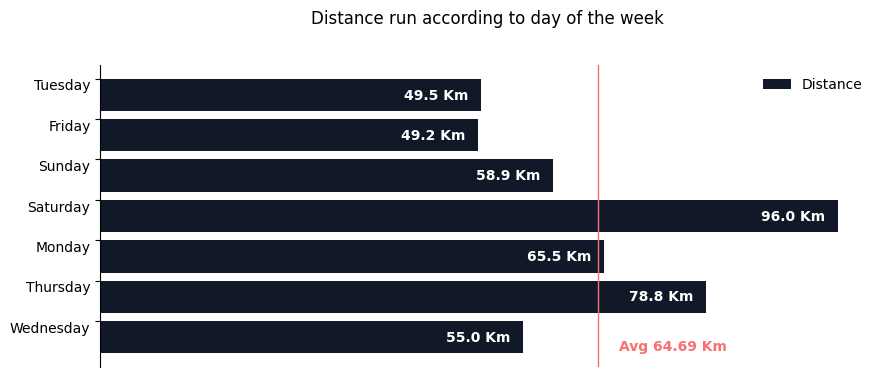

In [307]:
def repartitionPlot(x: list, y: list, title: str, label: str) -> None:
    fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
    bar_width = 0.80
    ind = np.arange(len(y))
    
    average = np.average(y.tolist());
    
    ax.barh(ind, y, bar_width)
    ax.set_yticks(ind + bar_width / 2)
    ax.set_yticklabels(x, minor=False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().set_ticks([])

    plt.title(title)
    plt.rcParams['axes.titlepad'] = 30
    ax.axvline(average, color=colors['red'][400], linewidth=1)
    ax.barh(x, y, color=colors['gray'][900], label=label)
    ax.legend(frameon=False)

    for label in ax.get_yticklabels():
        label.set_verticalalignment('top')

    for i, v in enumerate(y):
        ax.text(v - 10, i - .1, str(round(v, 1)) + " Km", color='white', fontweight='bold')
        
    
    for data, xoff in zip([y.tolist()], [15, -15]):
        x0 = average
        align = 'left' if xoff > 0 else 'right'

        ax.annotate(
            'Avg {:0.2f} Km'.format(x0), 
            xy=(x0, 0), 
            xytext=(xoff, 15),
            xycoords=('data', 'axes fraction'), 
            textcoords='offset points',
            fontweight='bold',
           horizontalalignment=align, 
            verticalalignment='center',
            color=colors['red'][400],
        )
        
    plt.show();

repartitionPlot(
    x=sessions_df['weekday'].unique(), 
    y=sessions_df.groupby(sessions_df['weekday'])[['distance']].sum()['distance'], 
    title="Distance run according to day of the week", 
    label="Distance"
)

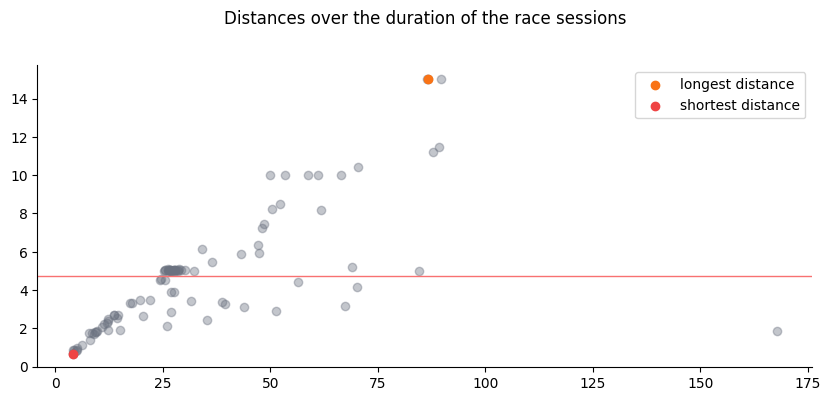

In [364]:
distances_df = sessions_df[['duration', 'distance']].sort_values(by="distance")

minimum = distances_df['distance'].min()
maximum = distances_df['distance'].max()
average = distances_df['distance'].mean()
  
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
plt.title("Distances over the duration of the race sessions")
plt.rcParams['axes.titlepad'] = 30
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.axhline(average, color=colors['red'][400], linewidth=1)
ax.scatter(distances_df['duration'], distances_df['distance'], color=colors['gray'][500], alpha=0.4)
ax.scatter(
    distances_df['duration'][distances_df['distance'] == maximum], 
    maximum, 
    color=colors['orange'][500],
    label="longest distance"
)
ax.scatter(
    distances_df['duration'][distances_df['distance'] == minimum], 
    minimum, 
    color=colors['red'][500],
    label="shortest distance"
)
ax.legend();

## What is the progression of my average speed

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

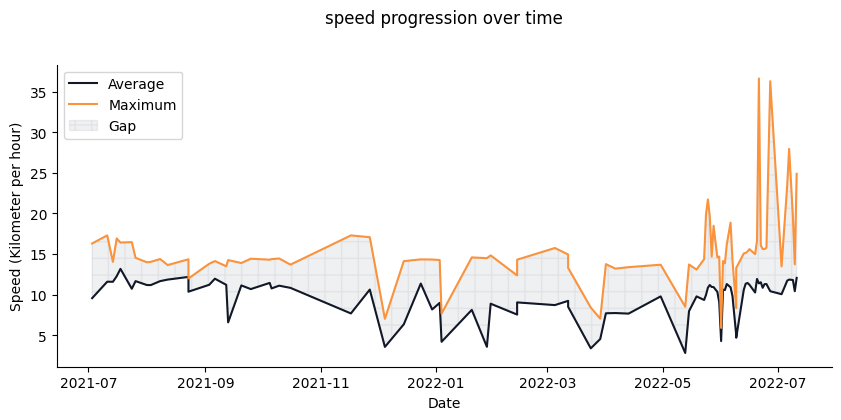

In [309]:
speed_df = sessions_df[['created_at', 'max_speed', 'average_speed']].sort_values(by='created_at')
speed_df = speed_df.reset_index(drop=True)
speed_df = speed_df[speed_df['created_at'] > dt.date(2021, 1, 1)]

fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
plt.title("speed progression over time")
plt.rcParams['axes.titlepad'] = 30
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Date")
plt.ylabel("Speed (Kilometer per hour)")

ax.plot(
    speed_df['created_at'], 
    speed_df['average_speed'], 
    color=colors['gray'][900],
    label="Average"
)
ax.plot(
    speed_df['created_at'], 
    speed_df['max_speed'], 
    color=colors['orange'][400],
    label="Maximum",
    linestyle="-"
)
ax.fill_between(
    speed_df['created_at'], 
    speed_df['average_speed'],
    speed_df['max_speed'],
    color=colors['gray'][500], 
    alpha=0.1,
    hatch="+",
    label="Gap"
)

ax.legend();
plt.show();

## Number of steps according to the distance covered

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

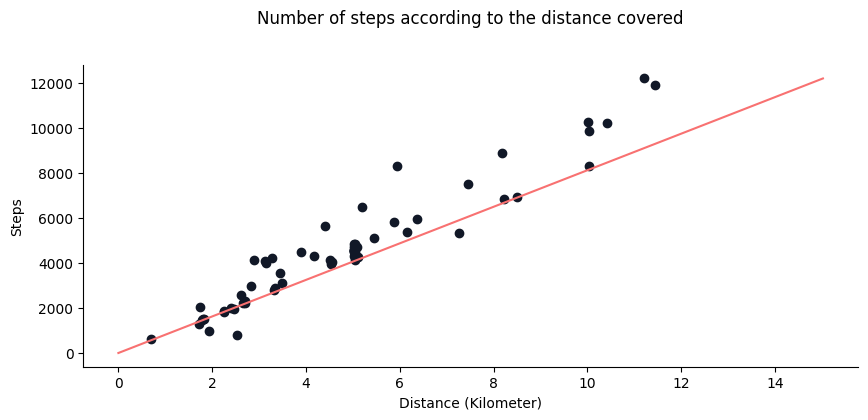

In [310]:
speed_df = sessions_df[['created_at', 'max_speed', 'total_steps', 'distance']].sort_values(by='created_at')
speed_df = speed_df.reset_index(drop=True)
speed_df = speed_df[speed_df['created_at'] > dt.date(2021, 1, 1)]

fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
plt.title("Number of steps according to the distance covered")
plt.rcParams['axes.titlepad'] = 30
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Distance (Kilometer)")
plt.ylabel("Steps")

ax.scatter(
    speed_df['distance'], 
    speed_df['total_steps'], 
    color=colors['gray'][900],
);

ax.plot(
    [0, speed_df['distance'].max()], 
    [0, speed_df['total_steps'].max()], 
    color=colors['red'][400]
);

## Does temperature influences my running performances ?

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).

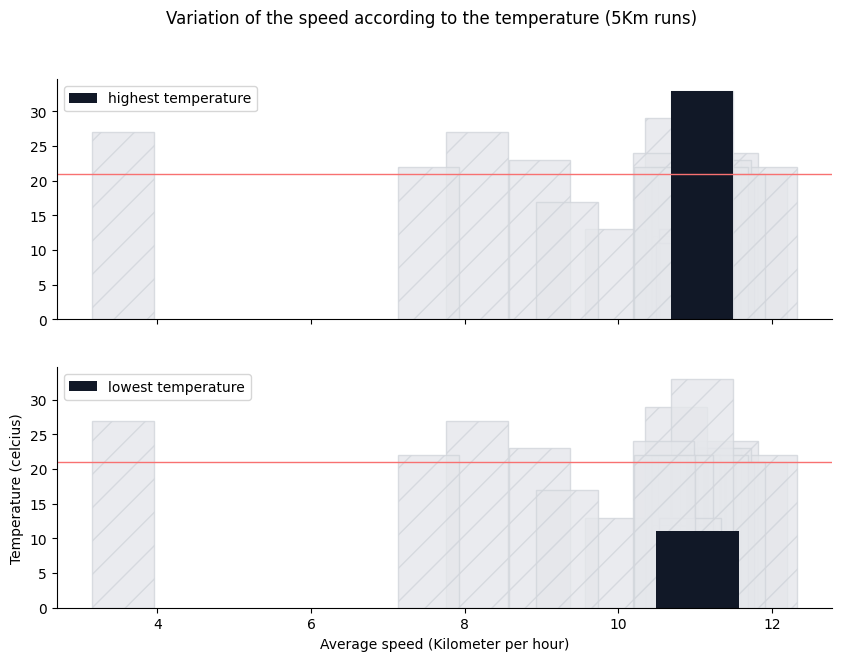

In [361]:
temperature_df = sessions_df[sessions_df['created_at'] > dt.date(2021, 1, 1)]
temperature_df = temperature_df[['distance', 'duration', 'temperature', 'average_speed']].dropna()
temperature_df = temperature_df.loc[temperature_df['distance'] >= 5]
temperature_df = temperature_df.loc[temperature_df['distance'] < 6].reset_index(drop=True)

minimum = temperature_df['temperature'].min()
maximum = temperature_df['temperature'].max()
average = temperature_df['temperature'].mean()

fig, axs = plt.subplots(2, figsize=(10, 7), dpi=100, sharex=True, sharey=True)
fig.suptitle("Variation of the speed according to the temperature (5Km runs)")
plt.rcParams['axes.titlepad'] = 30
plt.xlabel("Average speed (Kilometer per hour)")
plt.ylabel("Temperature (celcius)")

axs[0].bar(
    temperature_df['average_speed'],
    temperature_df['temperature'],
    color=colors['gray'][200],
    hatch="/",
    edgecolor=colors['gray'][300],
    alpha=0.8
);
axs[0].bar(
    temperature_df['average_speed'][temperature_df['temperature'] == maximum], 
    maximum, 
    color=colors['gray'][900],
    label="highest temperature",
)

axs[1].bar(
    temperature_df['average_speed'],
    temperature_df['temperature'],
    color=colors['gray'][200],
    hatch="/",
    edgecolor=colors['gray'][300],
    alpha=0.8
);
axs[1].bar(
    temperature_df['average_speed'][temperature_df['temperature'] == minimum], 
    minimum, 
    color=colors['gray'][900],
    label="lowest temperature",
);

for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axhline(average, color=colors['red'][400], linewidth=1)
    ax.legend();